In [105]:
# Importando Bibliotecas 

import os
import numpy as np


import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [106]:
# Busar quantidade de imagens nas pastas para validacao

count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir + ' Pasta tem '+ str(len(files)) + ' Imagens')
    count = count + len(files)
print( 'Total de imagens ' + str(count) + ' Imagens') 



morango Pasta tem 250 Imagens
pessego Pasta tem 250 Imagens
roma Pasta tem 250 Imagens
Total de imagens 750 Imagens


In [107]:
base_dir = 'Images/'
img_size = 300
batch = 32
epochs = 10
learning_rate = 0.0001

In [108]:
# Carregar as imagens em Arrays Dataset

#Treinamento e testes (teste nunca vistos pelo processo de treinamento)
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.75,
    subset = 'training',
    batch_size = batch,
    image_size = (img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.25,
    subset = 'validation',
    batch_size = batch,
    image_size = (img_size,img_size))


Found 750 files belonging to 3 classes.
Using 188 files for training.
Found 750 files belonging to 3 classes.
Using 187 files for validation.


In [109]:
fruits_names = train_ds.class_names
fruits_names

['morango', 'pessego', 'roma']

In [110]:
import matplotlib.pyplot as plt

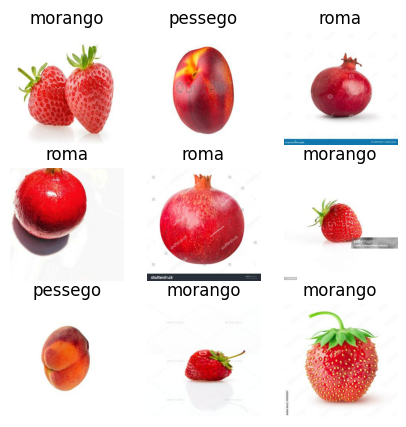

In [111]:
i = 0

plt.figure(figsize=(5,5))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(fruits_names[labels[i]])
        plt.axis('off')
    

In [112]:
#pré-busca em buffer para que você possa produzir dados do disco sem que a E/S se torne um bloqueio
AUTOTUNE = tf.data.AUTOTUNE

In [113]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [114]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [115]:
#Aumento de dados
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

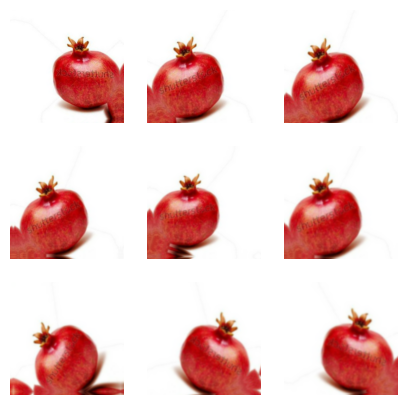

In [116]:
i = 0
plt.figure(figsize = (5,5))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [117]:
# Modelo de Criacao 

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    
    layers.Dense(128, activation = 'relu'),
    layers.Dense(5)
])


In [118]:
#Compilar e treinar o modelo

model.compile (optimizer = 'adam',
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
               metrics = ['accuracy'])

In [124]:
print (model.summary())

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)           │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_8 (Rescaling)              │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 300, 300, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 150, 150, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 150, 150, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │      11,214,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,717,617 (128.62 MB)

 Trainable params: 11,239,205 (42.87 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,478,412 (85.75 MB)

None


In [120]:
history = model.fit(train_ds, epochs = 500, validation_data = val_ds)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.1993 - loss: 3.0019 - val_accuracy: 0.5722 - val_loss: 1.1178
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4714 - loss: 1.2735 - val_accuracy: 0.5134 - val_loss: 1.2662
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5240 - loss: 1.0848 - val_accuracy: 0.5882 - val_loss: 0.9086
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6780 - loss: 0.7977 - val_accuracy: 0.6738 - val_loss: 0.7046
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6658 - loss: 0.7724 - val_accuracy: 0.7754 - val_loss: 0.6296
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7718 - loss: 0.5729 - val_accuracy: 0.6898 - val_loss: 0.6497
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7914 - loss: 0.4801 - val_accuracy: 0.8342 - val_loss: 0.4308
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8863 - loss: 0.3213 - val_accuracy: 0.8449 - val_loss: 0.3893
Epoch 9

In [121]:
#Prever os valores

def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size = (300,300))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array , 0)
    
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])

    outcome = 'A imagem pertence a classe ' + fruits_names[np.argmax(result)] + ' com percentual de acerto de ' +  str(np.max(result)*100) + '%'
    
    return outcome

In [122]:
classify_images('Sample/ms_2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


'A imagem pertence a classe morango com percentual de acerto de 100.0%'

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [125]:
# SALVAR MODELO

model.save('Modelo_01_100.keras')